In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-failure-prediction/heart.csv


In [2]:
df=pd.read_csv('/kaggle/input/heart-failure-prediction/heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
df.isnull().sum()
df=df.reset_index()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           918 non-null    int64  
 1   Age             918 non-null    int64  
 2   Sex             918 non-null    object 
 3   ChestPainType   918 non-null    object 
 4   RestingBP       918 non-null    int64  
 5   Cholesterol     918 non-null    int64  
 6   FastingBS       918 non-null    int64  
 7   RestingECG      918 non-null    object 
 8   MaxHR           918 non-null    int64  
 9   ExerciseAngina  918 non-null    object 
 10  Oldpeak         918 non-null    float64
 11  ST_Slope        918 non-null    object 
 12  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 93.4+ KB


In [4]:
df.head()

,index,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [5]:
categorical_columns=[];
for i in df.columns:
    if df[i].dtype==object:
        categorical_columns.append(i)

for  i in categorical_columns:
    print(f"{i}","->",df[i].value_counts())

Sex -> Sex
M    725
F    193
Name: count, dtype: int64
ChestPainType -> ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64
RestingECG -> RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64
ExerciseAngina -> ExerciseAngina
N    547
Y    371
Name: count, dtype: int64
ST_Slope -> ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64


In [6]:
numeric_columns=[];
for i in df.columns:
    if i not in categorical_columns:
        numeric_columns.append(i);

numeric_columns.remove('Oldpeak')
numeric_columns.remove('HeartDisease')


### feature selection

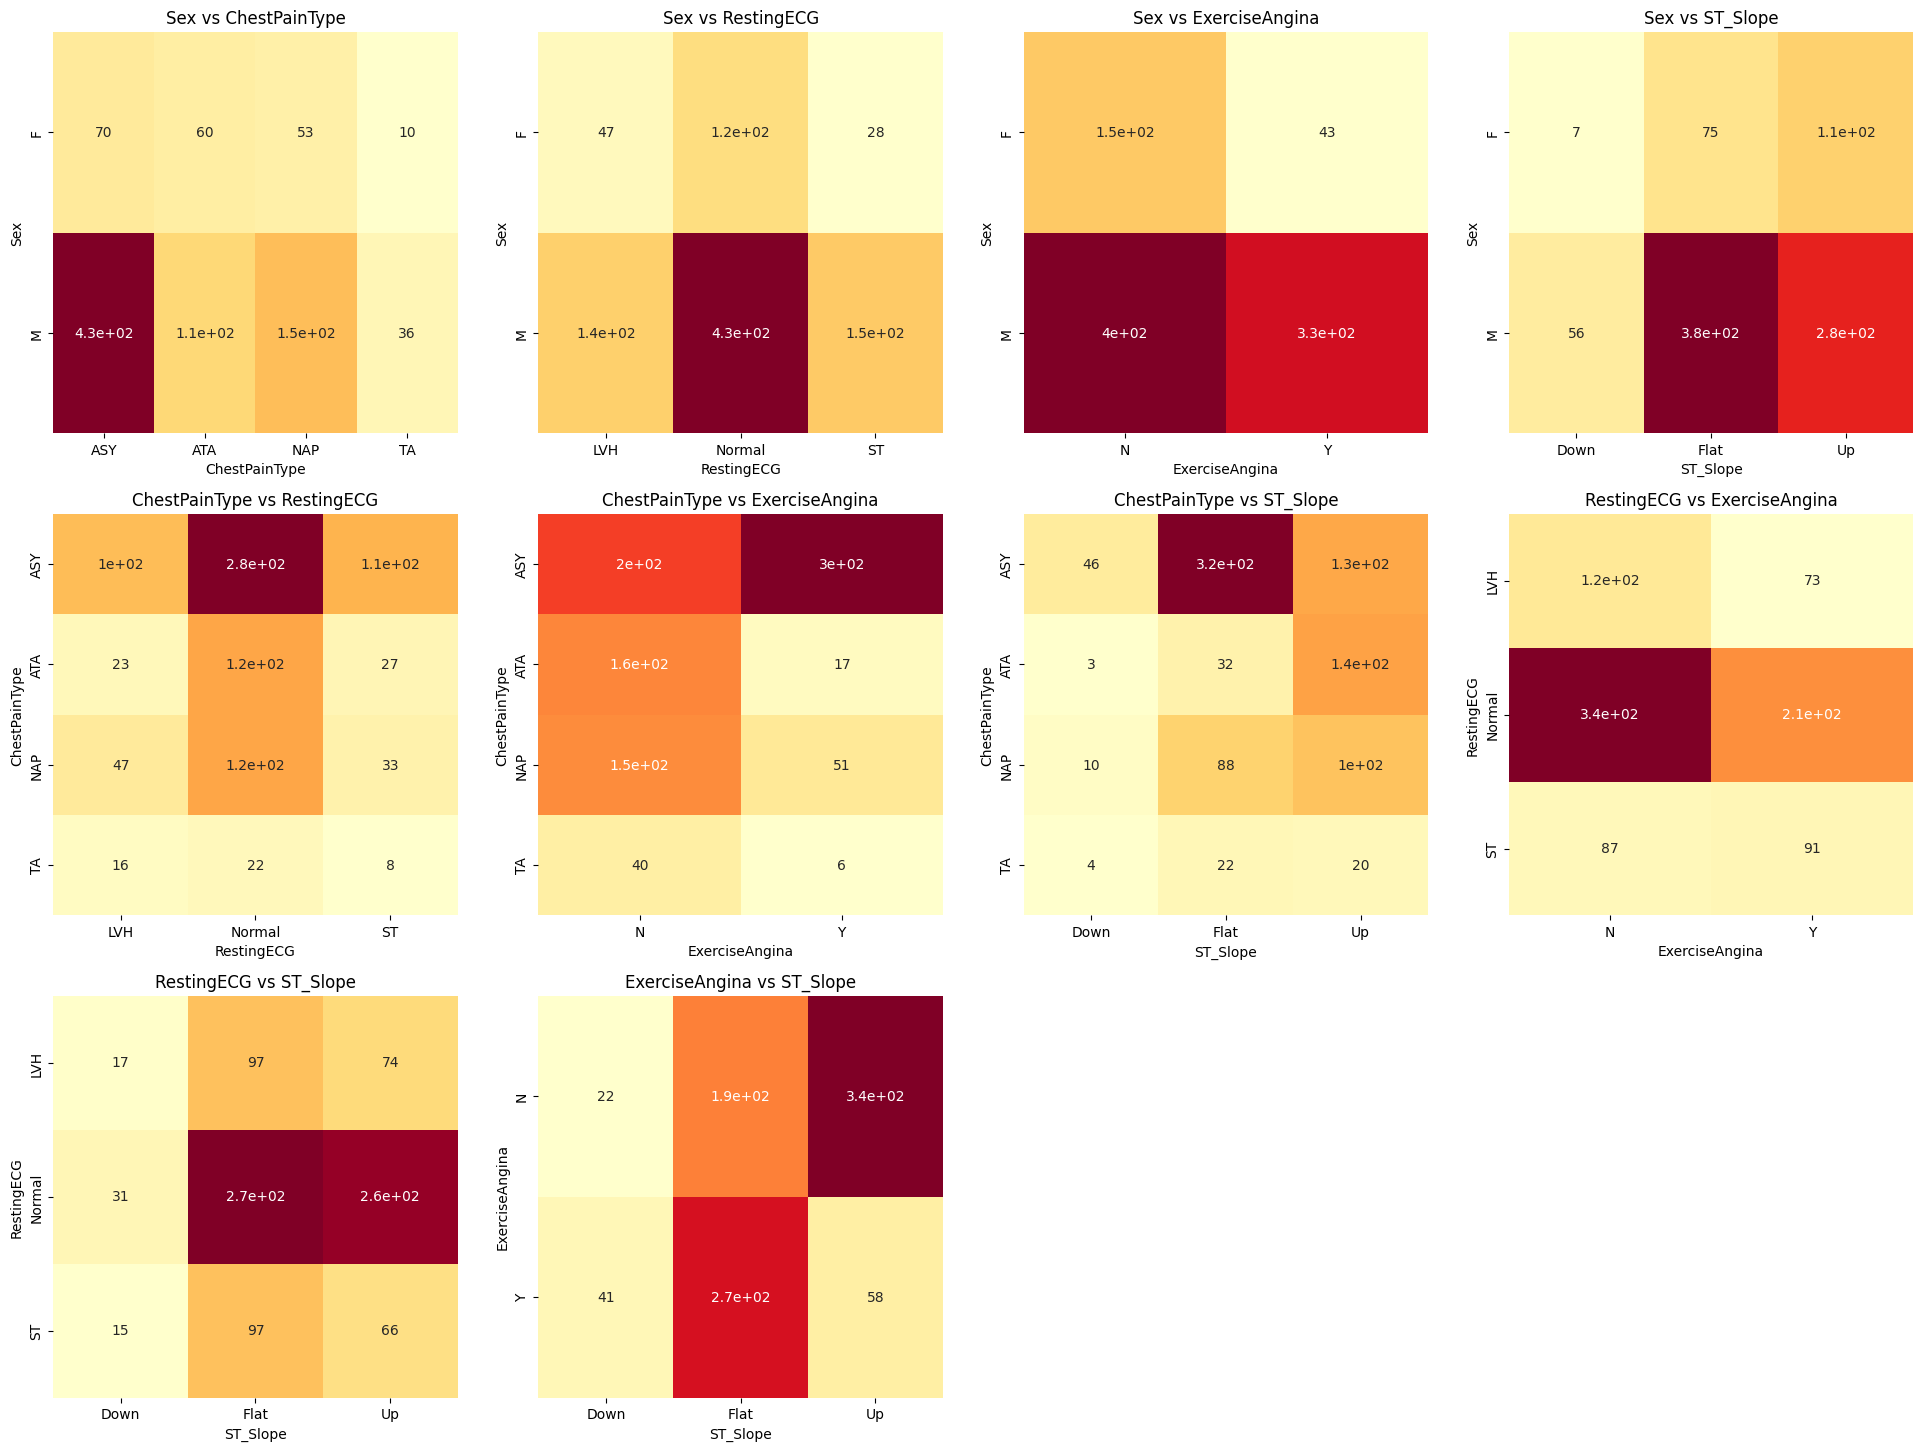

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

index = 1
plt.figure(figsize=(24, 24))  

for i in range(len(categorical_columns)):
    for j in range(i + 1, len(categorical_columns)):
        plt.subplot(4, 4, index)  
        sns.heatmap(
            pd.crosstab(df[categorical_columns[i]], df[categorical_columns[j]]), 
            cbar=False, cmap='YlOrRd', annot=True
        )
        plt.title(f"{categorical_columns[i]} vs {categorical_columns[j]}")
        plt.xlabel(categorical_columns[j])
        plt.ylabel(categorical_columns[i])
        
        index += 1  
        
        
        


### lots of dependices :
     
     *sex vs chestpain-type have a almost all shades, also if sex is male and ExerciseAngina  Y(Yes)==N(No)+10% but not in women , in sex vs st_slope we have a lot chance of (men with flat)/total men >> (female with flat)/(total female) ...... *


FOR SUCH CASES WE CAN USE CHI2_SQUARE_TEST
     
  

In [8]:
from scipy.stats import chi2_contingency

for i in range(len(categorical_columns)):
    for j in range(i+1, len(categorical_columns)):
        chi2_val, p_val, _, _ = chi2_contingency(pd.crosstab(df[categorical_columns[i]], df[categorical_columns[j]]))
        
        if p_val < 0.05:
            print(f"{categorical_columns[i]} is dependent on {categorical_columns[j]} with p_val = {p_val}")
        else:
            print(f"{categorical_columns[i]} is independent of {categorical_columns[j]} with p_val = {p_val}")


Sex is dependent on ChestPainType with p_val = 4.880336281360552e-08
Sex is independent of RestingECG with p_val = 0.08912244139807841
Sex is dependent on ExerciseAngina with p_val = 1.2387163558796499e-08
Sex is dependent on ST_Slope with p_val = 1.83174739624214e-05
ChestPainType is dependent on RestingECG with p_val = 0.003596780905759451
ChestPainType is dependent on ExerciseAngina with p_val = 1.2659099121635848e-38
ChestPainType is dependent on ST_Slope with p_val = 2.705381063690865e-31
RestingECG is dependent on ExerciseAngina with p_val = 0.004941141203261243
RestingECG is independent of ST_Slope with p_val = 0.10329552404263315
ExerciseAngina is dependent on ST_Slope with p_val = 2.70285624656344e-42


**HeartDisease vs categorical_columns**# 

In [9]:
df['HeartDisease']=df['HeartDisease'].astype('object')
for i in categorical_columns:
    chi2_val,p_val, _, _=chi2_contingency(pd.crosstab(df['HeartDisease'],df[i]))
    if p_val < 0.001:
            print(f"{i} is dependent on {'HeartDisease'} with p_val = {p_val}")
    else:
        print(f"{i} is independent of {'HeartDisease'} with p_val = {p_val}")





Sex is dependent on HeartDisease with p_val = 4.597617450809164e-20
ChestPainType is dependent on HeartDisease with p_val = 8.08372842808765e-58
RestingECG is independent of HeartDisease with p_val = 0.0042292328167544925
ExerciseAngina is dependent on HeartDisease with p_val = 2.907808387659878e-50
ST_Slope is dependent on HeartDisease with p_val = 5.167637689470128e-78


/// **RESTINGECG IS Least dependent on HeartDisease with farily low dependencies on ChestPainType,ExerciseAngina and independent on Sex so eliminating it would be wise to reduce features.**

In [10]:
categorical_columns.remove('RestingECG')

In [11]:
matrix=df.describe()
df[df['Cholesterol']==0].shape

(172, 13)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

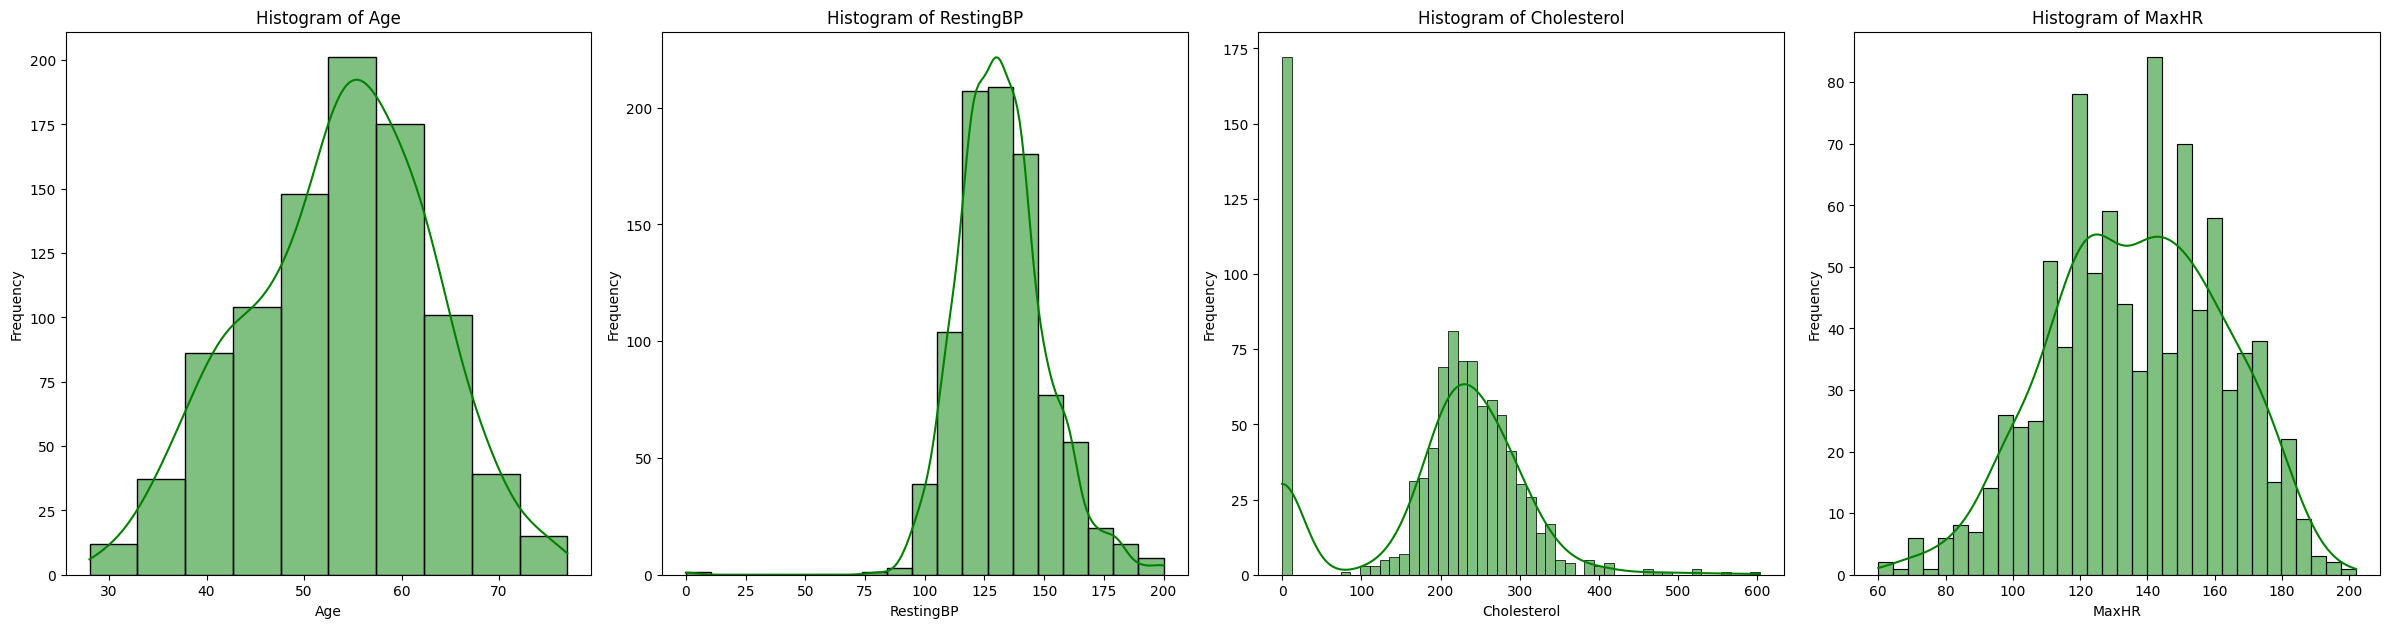

In [12]:
bin_lenght = []
for i in numeric_columns:
    # Freedman-Diaconis Rule for bins
    iqr = matrix.loc['75%'][i] - matrix.loc['25%'][i]
    bin_width = 2 * iqr / (matrix.loc['count'][i] ** (1/3))
    
    if bin_width != 0:
        bin_lenght.append(int(np.ceil((df[i].max() - df[i].min()) / bin_width)))

# Ensure `hist_array` aligns with `bin_lenght`
hist_array = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR']

# Plot histograms
plt.figure(figsize=(24, 24))
for i in range(len(hist_array)):
    plt.subplot(4, 4, i + 1)  # Define a 6x6 grid of subplots
    sns.histplot(x=hist_array[i], bins=bin_lenght[i], data=df, kde=True,color='green')
    plt.title(f"Histogram of {hist_array[i]}")  # Add a title
    plt.xlabel(hist_array[i])  # Add x-axis label
    plt.ylabel("Frequency")  # Add y-axis label

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()



 as we can see that there are  outlier(s) frequency is quite controlled except in cholesterol because of people not having cholestrol

In [13]:
numeric_columns=['Cholesterol', 'RestingBP','Age', 'FastingBS', 'MaxHR']

In [14]:
## Calcuting outliers using z-test 

from scipy.stats import zscore
z_score_age=zscore(df['Age'])
z_score_RestingBP=zscore(df['RestingBP'])
z_score_Cholesterol=zscore(df['Cholesterol'])
z_score_MaxHR=zscore(df['MaxHR'])

print(f" the number of outliers in age  {df[z_score_age>3].shape[0]}")
print(f"the number of outliers in RestingBP {df[z_score_RestingBP>3].shape[0]}")
print(f" the number of outliers in Cholesterol  {df[z_score_Cholesterol>3].shape[0]}")
print(f"the number of outliers in MaxHR {df[z_score_MaxHR>3].shape[0]}")


numerical_df = df[(z_score_age <=3) & (z_score_RestingBP <= 3) & (z_score_Cholesterol <= 3) & (z_score_MaxHR <= 3)]



 the number of outliers in age  0
the number of outliers in RestingBP 7
 the number of outliers in Cholesterol  3
the number of outliers in MaxHR 0


<Axes: >

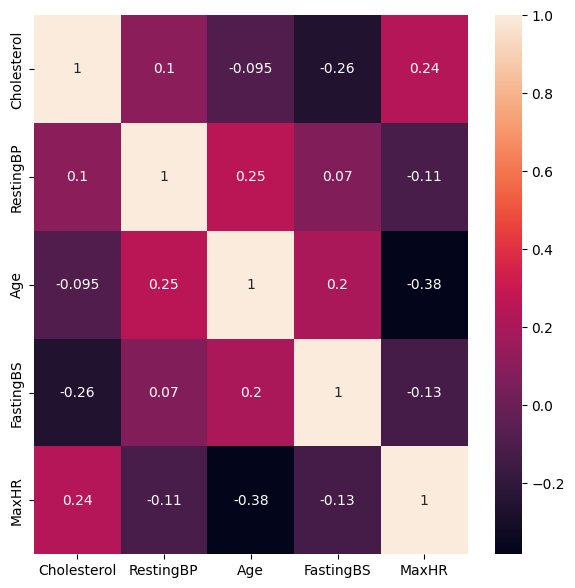

In [15]:
### Calculation of no of outliers and heatmap
plt.figure(figsize=(7,7))
from matplotlib.colors import LinearSegmentedColormap


colors = ['pink', 'lightcoral', 'orange']
cmap = LinearSegmentedColormap.from_list("custom_heatmap", colors)
sns.heatmap(df[numeric_columns].corr(),annot=True,cbar=True)

        

In [16]:
## vif calculation:
from statsmodels.stats.outliers_influence import variance_inflation_factor
numeric_columns_to_be_kept=[]
vif_data=numerical_df[numeric_columns]
total_columns=vif_data.shape[1]
columns_index=0;abs
for i in range(0,total_columns):
    vif_value=variance_inflation_factor(vif_data,columns_index)
    print(columns_index,'___',vif_value)
    if vif_value<=6:
        numeric_columns_to_be_kept.append(numeric_columns[i])
        columns_index=columns_index+1;
    else:
        vif_data=vif_data.drop([numeric_columns[i]],axis=1)

print(numeric_columns_to_be_kept)

0 ___ 5.106826572821114
1 ___ 44.927554383143146
1 ___ 12.866341231725327
1 ___ 1.322254276362313
2 ___ 5.502567175078661
['Cholesterol', 'FastingBS', 'MaxHR']


In [17]:
### lets us do t-test now 
df['HeartDisease']=df['HeartDisease'].astype('object')
from scipy.stats import ttest_ind
for i in numeric_columns_to_be_kept:
    groupA=df[df['HeartDisease']==1][i]
    groupB=df[df['HeartDisease']==0][i]

    t_stats,p_value=ttest_ind(groupA,groupB);

    print(f"T-Statistic:{i}----> {t_stats}")
    print(f"P-Value: {i}---->{p_value}")




T-Statistic:Cholesterol----> -7.242908595426182
P-Value: Cholesterol---->9.308308883532983e-13
T-Statistic:FastingBS----> 8.395149993293485
P-Value: FastingBS---->1.7535980103299486e-16
T-Statistic:MaxHR----> -13.22548998290478
P-Value: MaxHR---->1.1377859840278097e-36


this show that Cholesterol,FastingBS,MaxHR have p_val <<<0.05 

In [18]:
categorical_columns.append('index')
categorical_columns.append('HeartDisease')
numeric_columns_to_be_kept.append('index')
new_df=pd.merge(df[categorical_columns],numerical_df[numeric_columns_to_be_kept],left_on=['index'],right_on=['index'])

In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Sex             908 non-null    object
 1   ChestPainType   908 non-null    object
 2   ExerciseAngina  908 non-null    object
 3   ST_Slope        908 non-null    object
 4   index           908 non-null    int64 
 5   HeartDisease    908 non-null    object
 6   Cholesterol     908 non-null    int64 
 7   FastingBS       908 non-null    int64 
 8   MaxHR           908 non-null    int64 
dtypes: int64(4), object(5)
memory usage: 64.0+ KB


In [21]:
## label encoding of ExerciseAngina ,OneHotEncoding of Sex,ChestPainType,ST_Slope
new_df.loc[new_df['ExerciseAngina'] == 'Y', 'ExerciseAngina'] = 1
new_df.loc[new_df['ExerciseAngina'] == 'N', 'ExerciseAngina'] = 0

new_df= pd.get_dummies(new_df,columns=['ChestPainType'],prefix='type')
new_df=pd.get_dummies(new_df,columns=['Sex'],prefix='Gender')
new_df=pd.get_dummies(new_df,columns=['ST_Slope'],prefix='type')

In [22]:
new_df.head()

,ExerciseAngina,index,HeartDisease,Cholesterol,FastingBS,MaxHR,type_ASY,type_ATA,type_NAP,type_TA,Gender_F,Gender_M,type_Down,type_Flat,type_Up
0,0,0,0,289,0,172,False,True,False,False,False,True,False,False,True
1,0,1,1,180,0,156,False,False,True,False,True,False,False,True,False
2,0,2,0,283,0,98,False,True,False,False,False,True,False,False,True
3,1,3,1,214,0,108,True,False,False,False,True,False,False,True,False
4,0,4,0,195,0,122,False,False,True,False,False,True,False,False,True


In [23]:
df_encoded=new_df.replace({False:0,True:1})

/tmp/ipykernel_17/631759313.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_encoded=new_df.replace({False:0,True:1})


In [24]:
df_encoded.head()

,ExerciseAngina,index,HeartDisease,Cholesterol,FastingBS,MaxHR,type_ASY,type_ATA,type_NAP,type_TA,Gender_F,Gender_M,type_Down,type_Flat,type_Up
0,0,0,0,289,0,172,0,1,0,0,0,1,0,0,1
1,0,1,1,180,0,156,0,0,1,0,1,0,0,1,0
2,0,2,0,283,0,98,0,1,0,0,0,1,0,0,1
3,1,3,1,214,0,108,1,0,0,0,1,0,0,1,0
4,0,4,0,195,0,122,0,0,1,0,0,1,0,0,1


In [25]:
### Machine learning model selection
from sklearn.model_selection import train_test_split
y=df_encoded['HeartDisease']
x=df_encoded.drop(['HeartDisease'],axis=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

from sklearn.ensemble import RandomForestClassifier  # For classification
from sklearn.ensemble import RandomForestRegressor  # For regression

In [26]:
rf_classifier=RandomForestClassifier(n_estimators=200,random_state=42)
rf_classifier.fit(x_train,y_train)
y_pred=rf_classifier.predict(x_test)

In [27]:
from sklearn.metrics import accuracy_score

accuracy=accuracy_score(y_test,y_pred)
print()
print(f'Accuracy:{accuracy}')
print()
from sklearn.metrics import precision_recall_fscore_support
precision,recall,f1_score,_=precision_recall_fscore_support(y_test,y_pred)


Accuracy:0.8681318681318682



In [28]:
for i,v in enumerate([1,0]):
    print(f"Class{v}:")
    print(f"Precision: {precision[i]}")
    print(f"Recall: {recall[i]}")
    print(f"F1 Score :{f1_score[i]}")
    print()

Class1:
Precision: 0.8395061728395061
Recall: 0.8607594936708861
F1 Score :0.8500000000000001

Class0:
Precision: 0.8910891089108911
Recall: 0.8737864077669902
F1 Score :0.8823529411764707



In [29]:
from xgboost import XGBClassifier
from xgboost import XGBRegressor
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder

In [30]:
xgb_classifier=xgb.XGBClassifier(objective='multi:softmax',num_class=4)
y=df_encoded['HeartDisease']
x=df_encoded.drop(['HeartDisease'],axis=1)

label_encoder=LabelEncoder()
y_encoded=label_encoder.fit_transform(y)

x_train,x_test,y_train,y_test=train_test_split(x,y_encoded,test_size=0.2,random_state=42)


xgb_classifier.fit(x_train,y_train)
y_pred=xgb_classifier.predict(x_test)

precision,recall,f1_score,_=precision_recall_fscore_support(y_test,y_pred)

accuracy=accuracy_score(y_test, y_pred)
print()
print(f'accuracy: {accuracy:.6f}')
print()
for i,v in enumerate([1,0]):
    print(f"Class{v}:")
    print(f"Precision: {precision[i]}")
    print(f"Recall: {recall[i]}")
    print(f"F1 Score :{f1_score[i]}")
    print()


accuracy: 0.857143

Class1:
Precision: 0.8533333333333334
Recall: 0.810126582278481
F1 Score :0.8311688311688312

Class0:
Precision: 0.8598130841121495
Recall: 0.8932038834951457
F1 Score :0.8761904761904761



In [31]:
from sklearn.tree import DecisionTreeClassifier  
from sklearn.tree import DecisionTreeRegressor  
y= df_encoded['HeartDisease']
x=df_encoded.drop(['HeartDisease'],axis=1)

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=43)

dt_model=DecisionTreeClassifier(max_depth=20,min_samples_split=10)
dt_model.fit(x_train,y_train)
y_pred=dt_model.predict(x_test)

accuracy=accuracy_score(y_test, y_pred)
print()
print(f"Accuracy : {accuracy: .8f}")
print()

precision,recall,f1_score,_=precision_recall_fscore_support(y_test,y_pred)

accuracy=accuracy_score(y_test, y_pred)
print()
print(f'accuracy: {accuracy:.6f}')
print()
for i,v in enumerate([1,0]):
    print(f"Class{v}:")
    print(f"Precision: {precision[i]}")
    print(f"Recall: {recall[i]}")
    print(f"F1 Score :{f1_score[i]}")
    print()



Accuracy :  0.80219780


accuracy: 0.802198

Class1:
Precision: 0.7741935483870968
Recall: 0.8275862068965517
F1 Score :0.7999999999999999

Class0:
Precision: 0.8314606741573034
Recall: 0.7789473684210526
F1 Score :0.8043478260869564



In [32]:
param_grid={
    'colsample_bytree':[0.1,0.3,0.5],
    'learning_rate':[0.01,0.1],
    'max_depth':[3,5,8],
    'alpha':[1,5,10],
    'n_estimators':[10,50]
}
index=0
answer_grid={
    'combination' :[],
    'train_Accuracy' :[],
    'test_Accuracy':[],
    'colsample_bytree' :[],
    'learning_rate':[],
    'max_depth':[],
    'alpha' :[],
    'n_estimators' :[]
    
}

In [33]:
for colsample_bytree in param_grid['colsample_bytree']:
    for learning_rate in param_grid['learning_rate']:
        for max_depth in param_grid['max_depth']:
            for alpha in param_grid['alpha']:
                for n_estimators in param_grid['n_estimators']:
                    index=index+1
                    model=xgb.XGBClassifier(objective='multi:softmax',
                                           num_class=4,
                                           colsample_bytree=colsample_bytree,
                                           learning_rate=learning_rate,
                                           max_depth=max_depth,
                                           alpha=alpha,
                                           n_estimators=n_estimators)
                    y=df_encoded['HeartDisease']
                    x=df_encoded.drop(['HeartDisease'],axis=1)

                    label_encoder=LabelEncoder()
                    y_encoded=label_encoder.fit_transform(y)

                    x_train,x_test,y_train,y_test=train_test_split(x,y_encoded,test_size=0.2,random_state=45)

                    model.fit(x_train,y_train)

                    ##Predicting on train and test sets
                    y_pred_train=model.predict(x_train)
                    y_pred_test=model.predict(x_test)

                    ## Calculate train and test results
                    train_accuracy=accuracy_score(y_train,y_pred_train)
                    test_accuracy=accuracy_score(y_test,y_pred_test)
                    answer_grid['combination'].append(index)
                    answer_grid['train_Accuracy'].append(train_accuracy)
                    answer_grid['test_Accuracy'].append(test_accuracy)
                    answer_grid['colsample_bytree'].append(colsample_bytree)
                    answer_grid['learning_rate'].append(max_depth)
                    answer_grid['max_depth'].append(alpha)
                    answer_grid['alpha'].append(alpha)
                    answer_grid['n_estimators'].append(n_estimators)

                    #Print results for this combination
                    print(f"Combination{index}")
                    print(f"colsample_bytree:{colsample_bytree},learning_rate:{learning_rate},max_depth :{max_depth},alpha:{alpha},n_estimators :{n_estimators}")
                    print(f"Train_Accuracy:{train_accuracy: .2f}")
                    print(f"Test Accuracy :{test_accuracy : .2f}")
                    print("-"*30)

Combination1
colsample_bytree:0.1,learning_rate:0.01,max_depth :3,alpha:1,n_estimators :10
Train_Accuracy: 0.85
Test Accuracy : 0.91
------------------------------
Combination2
colsample_bytree:0.1,learning_rate:0.01,max_depth :3,alpha:1,n_estimators :50
Train_Accuracy: 0.85
Test Accuracy : 0.91
------------------------------
Combination3
colsample_bytree:0.1,learning_rate:0.01,max_depth :3,alpha:5,n_estimators :10
Train_Accuracy: 0.84
Test Accuracy : 0.91
------------------------------
Combination4
colsample_bytree:0.1,learning_rate:0.01,max_depth :3,alpha:5,n_estimators :50
Train_Accuracy: 0.85
Test Accuracy : 0.91
------------------------------
Combination5
colsample_bytree:0.1,learning_rate:0.01,max_depth :3,alpha:10,n_estimators :10
Train_Accuracy: 0.84
Test Accuracy : 0.91
------------------------------
Combination6
colsample_bytree:0.1,learning_rate:0.01,max_depth :3,alpha:10,n_estimators :50
Train_Accuracy: 0.85
Test Accuracy : 0.91
------------------------------
Combination7
c

### conclusion: *** 
the parameter with parameter :-
                 colsample_bytree:0.5,learning_rate:0.1,max_depth :8,alpha:5,n_estimators :50 (give best value) 


**Train_Accuracy: 0.90   Test Accuracy : 0.90**

00